### Importing Libraries & Loading the dataset

In [1]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "14"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
df = pd.read_csv('../output/RFM_data')

In [4]:
df.head()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,74,2,5106.0
1,C1010012,117,1,1499.0
2,C1010014,154,2,1455.0
3,C1010018,85,1,30.0
4,C1010024,113,1,5000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838932 entries, 0 to 838931
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  838932 non-null  object 
 1   Recency     838932 non-null  int64  
 2   Frequency   838932 non-null  int64  
 3   Monetary    838932 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.6+ MB


In [6]:
df['Recency'] = df['Recency'].astype('float')

In [7]:
num_cols = df.select_dtypes(exclude='object')

num_cols

,Recency,Frequency,Monetary
0,74.0,2,5106.0
1,117.0,1,1499.0
2,154.0,2,1455.0
3,85.0,1,30.0
4,113.0,1,5000.0
...,...,...,...
838927,154.0,1,691.0
838928,85.0,1,222.0
838929,113.0,1,126.0
838930,103.0,1,50.0


### EDA

<Axes: xlabel='Recency'>

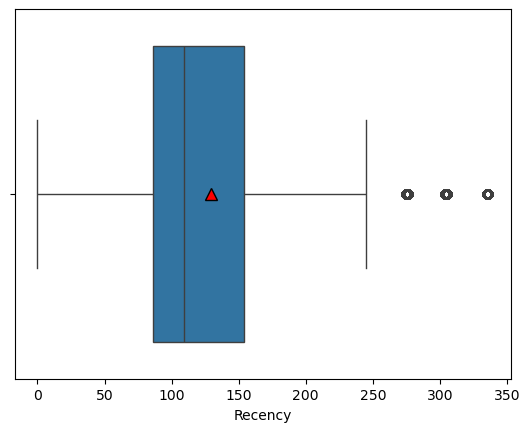

In [8]:
sns.boxplot(data=df, x=df['Recency'], showmeans=True, meanprops={'markerfacecolor':'red', "markeredgecolor": "black", "markersize": "8"})

<Axes: xlabel='Frequency'>

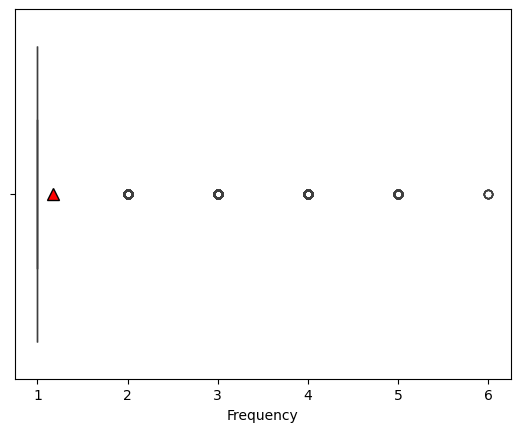

In [9]:
sns.boxplot(data=df, x=df['Frequency'], showmeans=True, meanprops={'markerfacecolor':'red', "markeredgecolor": "black", "markersize": "8"})

In [10]:
# How many rows of data does the outliers constitute?
# What are the techniques I can use to handle the outliers?
# 


<Axes: xlabel='Monetary'>

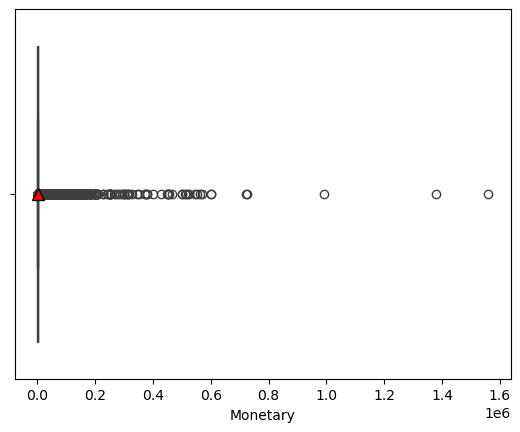

In [11]:
sns.boxplot(data=df, x=df['Monetary'], showmeans=True, meanprops={'markerfacecolor':'red', "markeredgecolor": "black", "markersize": "8"})

### Data Preprocessing

In [12]:
df = df.drop('CustomerID', axis=1)

#### Encoding categorical values

In [13]:
# encoder = LabelEncoder()

# df['CustomerID'] = encoder.fit_transform(df['CustomerID'])

# df.head()

#### Scale and standardize the numerical columns

In [14]:
# What is the shape of the data in each column? 
# The shape of the data determines the type of scaler you would be using. To determine that we have to do perform some basic EDA.


In [15]:

num_cols

,Recency,Frequency,Monetary
0,74.0,2,5106.0
1,117.0,1,1499.0
2,154.0,2,1455.0
3,85.0,1,30.0
4,113.0,1,5000.0
...,...,...,...
838927,154.0,1,691.0
838928,85.0,1,222.0
838929,113.0,1,126.0
838930,103.0,1,50.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838932 entries, 0 to 838931
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Recency    838932 non-null  float64
 1   Frequency  838932 non-null  int64  
 2   Monetary   838932 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 19.2 MB


In [17]:
scaler = RobustScaler()

df[num_cols.columns] = scaler.fit_transform(df[num_cols.columns])

In [18]:
df

,Recency,Frequency,Monetary
0,-0.514706,1.0,3.775410
1,0.117647,0.0,0.818852
2,0.661765,1.0,0.782787
3,-0.352941,0.0,-0.385246
4,0.058824,0.0,3.688525
...,...,...,...
838927,0.661765,0.0,0.156557
838928,-0.352941,0.0,-0.227869
838929,0.058824,0.0,-0.306557
838930,-0.088235,0.0,-0.368852


In [19]:
df.head()

,Recency,Frequency,Monetary
0,-0.514706,1.0,3.775410
1,0.117647,0.0,0.818852
2,0.661765,1.0,0.782787
3,-0.352941,0.0,-0.385246
4,0.058824,0.0,3.688525


In [20]:
# Test different numbers of clusters
K_range = range(2, 16)
inertias = []
silhouette_scores_list = []
davies_bouldin_scores = []

print("Testing different numbers of clusters...\n")
print(f"{'K':>3} | {'Inertia':>15} | {'Silhouette':>12} | {'Davies-Bouldin':>15}")
print("-" * 55)

for k in K_range:
    # Create clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df, labels, sample_size=10000)
    davies_bouldin = davies_bouldin_score(df, labels)
    
    # Store results
    inertias.append(inertia)
    silhouette_scores_list.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    
    # Print
    print(f"{k:>3} | {inertia:>15,.0f} | {silhouette:>12.4f} | {davies_bouldin:>15.4f}")

print("\n✅ Testing complete!")


Testing different numbers of clusters...

  K |         Inertia |   Silhouette |  Davies-Bouldin
-------------------------------------------------------
  2 |      15,629,996 |       0.9484 |          0.4820
  3 |      10,292,868 |       0.9256 |          0.4680
  4 |       6,879,568 |       0.8807 |          0.4402
  5 |       5,425,816 |       0.7336 |          0.5267
  6 |       4,100,121 |       0.7300 |          0.4861
  7 |       3,259,285 |       0.5094 |          0.5482
  8 |       2,553,318 |       0.5360 |          0.5378
  9 |       2,042,542 |       0.5313 |          0.5362
 10 |       1,724,513 |       0.5356 |          0.5604
 11 |       1,522,426 |       0.5340 |          0.5479
 12 |       1,387,570 |       0.5346 |          0.5560
 13 |       1,239,026 |       0.4994 |          0.5972
 14 |       1,117,818 |       0.4668 |          0.6168
 15 |       1,031,691 |       0.4154 |          0.5974

✅ Testing complete!


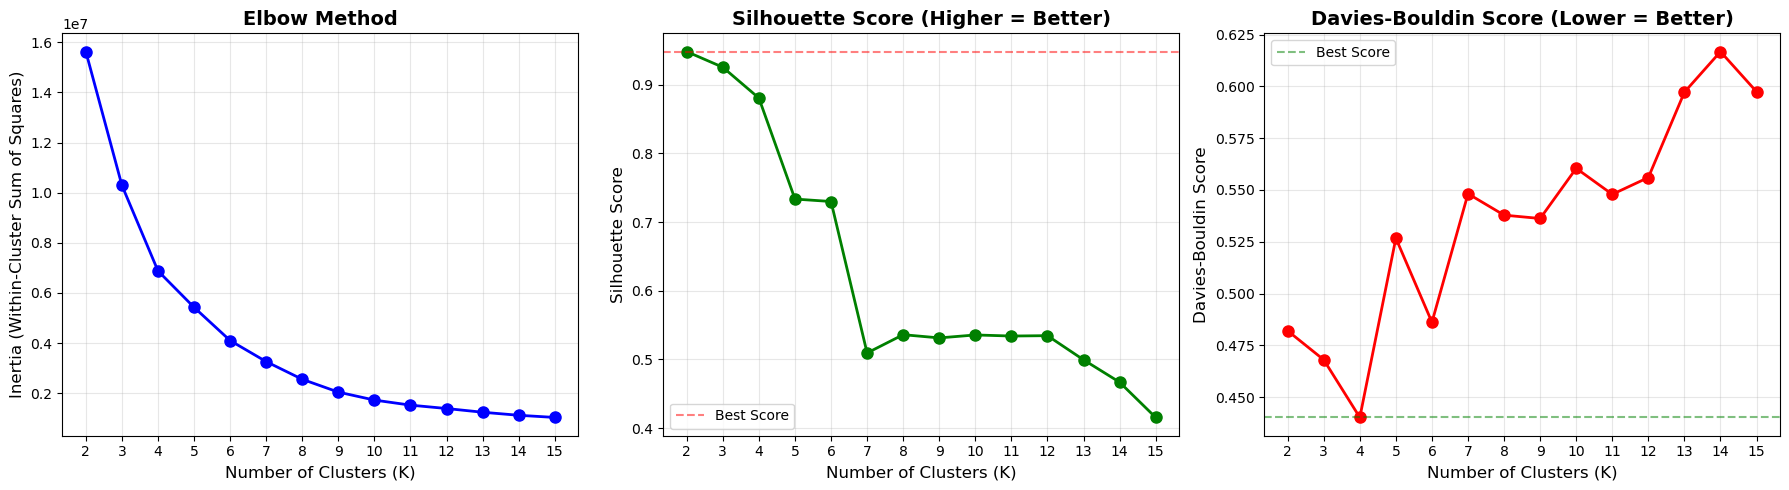

In [21]:
# Visualize all three methods
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(K_range)

# 2. Silhouette Score (higher = better)
axes[1].plot(K_range, silhouette_scores_list, 'go-', linewidth=2, markersize=8)
axes[1].axhline(y=max(silhouette_scores_list), color='red', linestyle='--', alpha=0.5, label='Best Score')
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score (Higher = Better)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(K_range)
axes[1].legend()

# 3. Davies-Bouldin Score (lower = better)
axes[2].plot(K_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[2].axhline(y=min(davies_bouldin_scores), color='green', linestyle='--', alpha=0.5, label='Best Score')
axes[2].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[2].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[2].set_title('Davies-Bouldin Score (Lower = Better)', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(K_range)
axes[2].legend()

plt.tight_layout()
plt.show()

In [22]:
# Determine optimal K
best_k_silhouette = K_range[silhouette_scores_list.index(max(silhouette_scores_list))]
best_k_davies = K_range[davies_bouldin_scores.index(min(davies_bouldin_scores))]

print("📊 RECOMMENDATIONS:\n")
print(f"Based on Silhouette Score: K = {best_k_silhouette} (score: {max(silhouette_scores_list):.4f})")
print(f"Based on Davies-Bouldin: K = {best_k_davies} (score: {min(davies_bouldin_scores):.4f})")
print(f"\nElbow Method: Look for the 'elbow' in the first chart (where the curve bends)")

# Choose the optimal k
optimal_k = best_k_davies  # Using Davies-Bouldin for better business granularity

print(f"\n🎯 FINAL CHOICE: K = {optimal_k}")
print(f"   This provides better business granularity for actionable segments")


📊 RECOMMENDATIONS:

Based on Silhouette Score: K = 2 (score: 0.9484)
Based on Davies-Bouldin: K = 4 (score: 0.4402)

Elbow Method: Look for the 'elbow' in the first chart (where the curve bends)

🎯 FINAL CHOICE: K = 4
   This provides better business granularity for actionable segments
